In [1]:
#import the libraries and dependencies
from textblob import TextBlob
import numpy as np
import pandas as pd
from os import path

In [2]:
#import matplotlib for use in displaying the wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import json
import os
import sqlalchemy
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Table, Column, Integer, String, MetaData, DateTime, Boolean
import psycopg2
import sys
import re
from datetime import datetime
import string
db_server = 'project-3-db.cnsppazvk5qa.us-east-2.rds.amazonaws.com'
db_port = 5432
db_pass = 'fred007!'
db_user = 'root'
db_name = 'projectDB'

Base = automap_base()

try:
    engine = create_engine('postgresql+psycopg2://{}:{}@{}/{}'.format(db_user,db_pass,db_server,db_name))
except:
    print(sys.exc_info()[0])
    exit

Base.prepare(engine, reflect=True)

Product = Base.classes.product
Reviews = Base.classes.reviews
Author = Base.classes.author

session = Session(engine)
array = []
array2 = []

fred = session.query(Reviews.text).all()
for i in fred:
    #joe = i[0].lower()
    # joe = re.sub(r'[^\w]','',joe)
    # print(joe)
    #f = joe.translate(str.maketrans('','',string.punctuation))
    array.append(i[0].lower().translate(str.maketrans('','',string.punctuation)))
    array2.append(i[0])

In [4]:
blob = TextBlob("array")

In [5]:
blob.tags

[('array', 'NN')]

In [6]:
polarity_list,subjectivity_list=[],[]

for i in array:
    blob = TextBlob(i)
    polarity_list.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)

In [7]:
print(polarity_list[:5])
print(subjectivity_list[:5])

[-0.9099999999999998, 0.0, 0.06666666666666665, 0.13541666666666666, 0.6499999999999999]
[0.8666666666666667, 0.0, 0.5333333333333333, 0.45625000000000004, 0.8]


In [8]:
#Polarity: Polarity score is a float within the range [-1.0, 1.0], 
#also known as orientation polarity is the emotion expressed in the sentence. 
#It can be positive, negative or neutral.
#Polarity ditribution
import seaborn as sns
sns.set(color_codes=True)
from pylab import *

C:\Users\reese\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


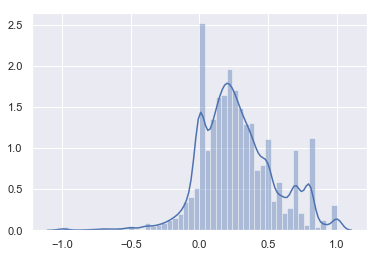

In [9]:
sns.distplot(polarity_list)
show()

C:\Users\reese\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


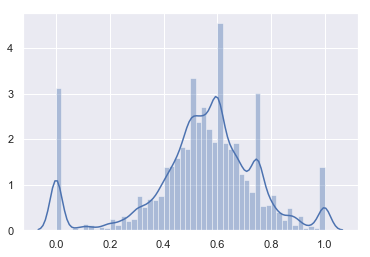

In [10]:
#Subjectivity Distribution
sns.distplot(subjectivity_list)
show()

In [11]:
#Creating a  statistical summary of polarity & subjectivity
from scipy import stats

print(stats.describe(polarity_list))
print(stats.describe(subjectivity_list))

DescribeResult(nobs=20394, minmax=(-1.0, 1.0), mean=0.276409421056579, variance=0.07586410711283058, skewness=0.11474782205360813, kurtosis=0.9308353881701383)
DescribeResult(nobs=20394, minmax=(0.0, 1.0), mean=0.5448231739957156, variance=0.0442660380449693, skewness=-0.7257368203154756, kurtosis=1.1294594355166598)
